# Assignment 2: Non-Linear Classification with SVM

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia

In this assignment, you will implement your own version of SVM with kernels to classify non-linear data. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_svm.ipynb**.


## 1. DATA SET AND VISUALIZATION FUNCTION
We will use the non-linear toy data called the Moon dataset. You may use the code snippet below to generate the train/test set. Feel free to change the number of samples, and noise level. Additionally, a function plot_svm() is provided to help you visualize the decision boundary, margin, and support vectors on the dataset in 2D feature space.

The provided function plot_svm() works out-the-box, and is the best way to visualize and evaluate the performance of your model. It assumes the classifier has an instance variable "self.support_vectors_", which is a numpy array of the support vectors found in training. DO NOT modify this function. Once your implementation in Task 3 is complete, the plots generated for your model should look similar to the plots generated for the standard library models in Task 2. 

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

#Runnign data through pipeline
pipe = Pipeline([
        ("scaler", StandardScaler()),
    ])

pipe.fit_transform(X_train)
pipe.fit_transform(X_test)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data
    
    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax] 
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 

- - -
## 2. TRAIN SVM FOR CLASSIFICATION TASK 

Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) Gaussian RBF. 

You should tune each model using a grid search or similar hyperparameter selection process, and report the best hyperparameters found. You will use these same hyperparameter settings later when testing and comparing to your implementation in Task 4. Once you've selected the best hyperparameters for each kernel, you will need to report the following:

* Confusion matrix, Recall, and Precision. If applicable, discuss any tuning process on C and/or gamma to get to a reasonable result.
* Use the provided plot_svm() to visualize the SVM in 2D. This might give you some insight on how SVM determines the margin and support vector on the Moon dataset.


Best parameters for the model:  {'C': 10, 'coef0': 0} 

Best estimator:  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 

Confusion matrix for training set:
 [[182  23]
 [ 24 171]]

Precision score for training set:  0.8814432989690721

Recall score for training set:  0.8769230769230769

Full Classification report for training set: 
               precision    recall  f1-score   support

        -1.0       0.88      0.89      0.89       205
         1.0       0.88      0.88      0.88       195

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400


Graph showing chosen support vectors and points:


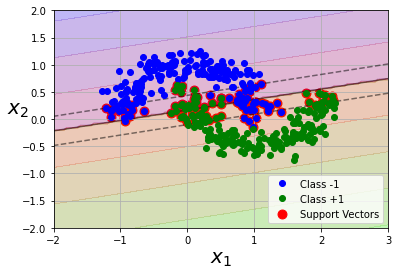

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report

#Fine tuning model using grid search
linear_svc_test = SVC(kernel="linear", C=1, random_state=42)

param_grid = [
    {'C': [0.01, 0.1, 1, 5, 10, 20, 50, 100], 'coef0': [0, 1, 5, 10, 20]},
  ]

grid_search = GridSearchCV(linear_svc_test, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters for the model: ", grid_search.best_params_, "\n")

print("Best estimator: ", grid_search.best_estimator_, "\n")

#Constructing linear SVM with the best parameters
linear_svc = SVC(kernel="linear", C=10, random_state=42)
linear_svc.fit(X_train, y_train)
y_predict_train = linear_svc.predict(X_train)

#constructing the confusion matrix and computing precision and recall metrics
print("Confusion matrix for training set:\n", confusion_matrix(y_train, y_predict_train))
print("\nPrecision score for training set: ", precision_score(y_train, y_predict_train))
print("\nRecall score for training set: ", recall_score(y_train, y_predict_train))
print("\nFull Classification report for training set: \n",classification_report(y_train,y_predict_train))

#Plotting model using given function
print("\nGraph showing chosen support vectors and points:")
plot_svm(linear_svc, X_train, y_train)


In [ ]:
y_predict_test = linear_svc.predict(X_test)

#Testing model on testing set and running metrics on it
print("Confusion matrix for test set:\n", confusion_matrix(y_test, y_predict_test))
print("\nPrecision score for test set: ", precision_score(y_test, y_predict_test))
print("\nRecall score for test set: ", recall_score(y_test, y_predict_test))
print("\nFull Classification report for test set: \n",classification_report(y_test,y_predict_test))


Confusion matrix for test set:
 [[34 11]
 [ 5 50]]

Precision score for test set:  0.819672131147541

Recall score for test set:  0.9090909090909091

Full Classification report for test set: 
               precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



Linear is bad for this example since the data is not linear and therefore can't be sperated by a line. It would be better to use a curve in a higher dimension to create a decision boundary.

Best parameters for the model:  {'C': 0.1, 'coef0': 1, 'degree': 5} 

Best estimator:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

Confusion matrix for training set:
 [[202   3]
 [  2 193]]

Precision score for training set:  0.9846938775510204

Recall score for training set:  0.9897435897435898

Full Classification report for training set: 
               precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       205
         1.0       0.98      0.99      0.99       195

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Graph showing chosen support vectors and points:


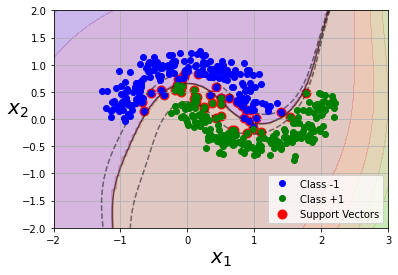

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,classification_report


#Fine tuning model using grid search
poly_svc_test = SVC(kernel="poly", degree=3, coef0=1, C=1)

param_grid = [
    {'C': [0.01, 0.1, 1, 5, 10, 20, 50, 100], 'degree': [2, 3, 4, 5], 'coef0': [0, 1, 5, 10, 20]},
  ]

grid_search = GridSearchCV(poly_svc_test, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters for the model: ", grid_search.best_params_, "\n")

print("Best estimator: ", grid_search.best_estimator_, "\n")

#Constructing polynomial SVM with the best parameters
poly_svc = SVC(kernel="poly", degree=5, coef0=1, C=0.1)
poly_svc.fit(X_train, y_train)
y_predict_train = poly_svc.predict(X_train)

#constructing the confusion matrix and computing precision and recall metrics
print("Confusion matrix for training set:\n", confusion_matrix(y_train, y_predict_train))
print("\nPrecision score for training set: ", precision_score(y_train, y_predict_train))
print("\nRecall score for training set: ", recall_score(y_train, y_predict_train))
print("\nFull Classification report for training set: \n", classification_report(y_train,y_predict_train))

#Plotting model using given function
print("\nGraph showing chosen support vectors and points:")
plot_svm(poly_svc, X_train, y_train)

In [ ]:
y_predict_test = poly_svc.predict(X_test)

#Testing model on testing set and running metrics on it
print("Confusion matrix for test set:\n", confusion_matrix(y_test, y_predict_test))
print("\nPrecision score for test set: ", precision_score(y_test, y_predict_test))
print("\nRecall score for test set: ", recall_score(y_test, y_predict_test))
print("\nFull Classification report for test set: \n",classification_report(y_test,y_predict_test))

Confusion matrix for test set:
 [[42  3]
 [ 0 55]]

Precision score for test set:  0.9482758620689655

Recall score for test set:  1.0

Full Classification report for test set: 
               precision    recall  f1-score   support

        -1.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



Fine tuning the polynomial SVM to the optimal degree, 5, and finding the right balance of a tight margin and low violation in a C=0.1 allowed me to create a very good model for this data set, with a perfect Recall score and a near percect Precision score.

Best parameters for the model:  {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 5} 

Best estimator:  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0,
    decision_function_shape='ovr', degree=2, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 

Confusion matrix for training set:
 [[202   3]
 [  1 194]]

Precision score for training set:  0.9847715736040609

Recall score for training set:  0.9948717948717949

Full Classification report for training set: 
               precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99       205
         1.0       0.98      0.99      0.99       195

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Graph showing chosen support vectors and points:


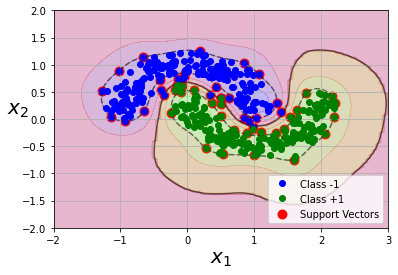

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report


#Fine tuning model using grid search
rbf_svc_test = SVC(kernel="rbf", gamma=5, C=0.001)

param_grid = [
    {'C': [0.01, 0.1, 1, 5, 10, 20, 50, 100], 'gamma':[1, 5, 10, 100], 'degree': [2, 3, 4, 5], 'coef0': [0, 1, 5, 10]},
  ]

grid_search = GridSearchCV(rbf_svc_test, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters for the model: ", grid_search.best_params_, "\n")

print("Best estimator: ", grid_search.best_estimator_, "\n")

#Constructing Gaussian SVM with the best parameters
rbf_svc = SVC(kernel="rbf", gamma=5, C=1, degree=2)
rbf_svc.fit(X_train, y_train)
y_predict_train = rbf_svc.predict(X_train)

#constructing the confusion matrix and computing precision and recall metrics
print("Confusion matrix for training set:\n", confusion_matrix(y_train, y_predict_train))
print("\nPrecision score for training set: ", precision_score(y_train, y_predict_train))
print("\nRecall score for training set: ", recall_score(y_train, y_predict_train))
print("\nFull Classification report for training set: \n", classification_report(y_train,y_predict_train))
#Plotting model using given function
print("\nGraph showing chosen support vectors and points:")
plot_svm(rbf_svc, X_train, y_train)

In [ ]:
y_predict_test = rbf_svc.predict(X_test)

#Testing model on testing set and running metrics on it
print("Confusion matrix for test set:\n", confusion_matrix(y_test, y_predict_test))
print("\nPrecision score for test set: ", precision_score(y_test, y_predict_test))
print("\nRecall score for test set: ", recall_score(y_test, y_predict_test))
print("\nFull Classification report for test set: \n",classification_report(y_test,y_predict_test))

Confusion matrix for test set:
 [[42  3]
 [ 0 55]]

Precision score for test set:  0.9482758620689655

Recall score for test set:  1.0

Full Classification report for test set: 
               precision    recall  f1-score   support

        -1.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



Using Gaussian RBF to create a model to classify this non-linear dataset proved to be the best. It had slightly better performance than the optimized polynomial SVM on the training set as well as the test set. Although, it was very close between the two models.

The RBF and polynomial models gave accurate and similar performances while the linear model was not accurate and significantly worse than the other two. 

## 3. IMPLEMENT YOUR OWN NON-LINEAR SVM
Now that you see how the standard library SVM perform on the dataset, you will attempt to implement your own version of SVM. To help you, a template of SVM has been created including the quadratic optimization. Essensially, you will get the optimized value of $\alpha$ for free. Note that there are **6 subtasks** which you need to implement in order to get the SVM to work properly.

The provided code is extensively documented in comments, so that you may write code compatible with it. DO NOT edit the provided code, but read the comments and ask Piazza questions as necessary to understand it.

Many of these tasks are made much easier by a working knowledge of numpy. If you have something you want to do, but are unsure how to do it in Python, consult the numpy documentation here: https://numpy.org/doc/1.17/reference/index.html. If you haven't built a Python class before, it may be worth scanning this tutorial: https://www.datacamp.com/community/tutorials/python-oop-tutorial.

In [ ]:
# Use the information from the lecture slides to formulate the SVM Kernels. 
# To help you get started, the Linear Kernel (simply just a dot product) has been provided to you. 
# These kernel functions will be called in the SVM class
# Linear Kernel             
def linear_kernel(u, v):
    return np.dot(u, v)

# Polynomial Kernel (of degree up to and including p)
def polynomial_kernel(u, v, p=5):
    # SUBTASK 1: Implement the kernel formulation here
    return (np.dot(u, v))**p

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=5):
    # SUBTASK 2: Implement the kernel formulation here
    # Note that gamma is provided, not sigma; see the slides for the relationship between gamma and sigma
    
    #gamma = 1/(2*sigma**2)
    norm = np.linalg.norm(u - v)
    sigma = 1/(np.sqrt(2*gamma))
    return np.exp(-(norm**2)/(2*(sigma**2)))

In [ ]:
import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin 
# extending these classes is required by all scikitlearn classes that will need fit, transform, and fit_transform functions
# this is what enables inclusion in pipelines and compatability with other scikitlearn structures and functions

class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel # the kernel function used; this is a function and can be called
        self.C = C # make sure to set this when instantiating this class; is C is None, your performance will be weird
        if self.C is not None: self.C = float(self.C)
        self.K = None
        self.a = None
        
        

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        self.X = X
        self.y = y

        m_samples, n_features = X.shape

        # To speed up repeated applications of the kernel function, dynamic programming is used
        # All pairs of points have the kernel function computed over them and the result stored in K
        # K is indexed by indices in X, so K[i,j] = kernel_function(X[i], X[j])
        # You may use K in your code later in this function, but are not required to
        # DO NOT edit this code
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])
        self.K = K

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        # DO NOT edit any of this code until Subtask 3
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        # Lagrange multipliers for each point in X
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        # sv is a boolean array
        # sv[i] is True iff a[i] is non-zero
        sv = a > 1e-3

        # SUBTASK 3: Find the support vectors
        # note that plot_svm expects self.support_vectors_ to be a numpy array
        # you can use a Python list in your implementation, as long as you cast to a numpy array at the end of this function
        # or, you can cast to a numpy array now
        # you should add lists to store any additional metadata related to each support vector necessary later
        # for example, if you will use the Lagrange multipliers in future calculations... 
        # ...you should add an instance variable which lists the Langrage multipliers for each support vector

        #Set lagrange multipliers for points on the boundary, one of the supports
        self.a = a[sv]

        #Setting the support vectors and getting the same y points
        self.support_vectors_ = X[sv]
        self.sv_y = y[sv]

        #creating this variable so that I can index into the Kernel matrix for the correct points
        k_ind = np.arange(len(a))[sv]

        #casting to numpy array
        self.support_vectors_ = np.array(self.support_vectors_)

        print("%d support vectors out of %d points" % (sum(sv), m_samples))

        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            # SUBTASK 4: Compute the Weight vector w

            #w = /Sigma/(a*y*x)
            for i in range(len(self.a)):
              self.w += self.a[i]*self.sv_y[i]*self.support_vectors_[i]

        else:
            # No need to compute for w in non-linear case
            # Instead, we will use alpha (a) directly to predict the labels
            self.w =  None
        
        # SUBTASK 5: Compute the Intercept b
        # b can be computed based on any arbitrary support vector
        # it is recommended that you use self.support_vectors_[0], since this will always exist
        # b should NOT be in terms of w, since w only exists in the linear case
        self.b = 0

        for i in range(len(self.a)):
          self.b += self.sv_y[i] - (np.sum(self.a*self.sv_y*self.K[k_ind[i], sv]))
        self.b /= len(self.a)


    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            # SUBTASK 6: for non-linear case, implement the kernel trick to predict label here
            # you are predicting one label for each point in X
            # note that this X may differ from the X passed to self.fit

            y_predict = np.zeros(len(X))  

            #loop through passed in X points and our support vectors to call the kernel function on those points
            for i in range(len(X)):
              for j in range(len(self.support_vectors_)):
                y_predict[i] += np.dot(self.a[j] * self.sv_y[j] , self.kernel(self.support_vectors_[j], X[i]) )
              y_predict[i] += self.b
    
            return y_predict

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))



---
## 4. COMPARE YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own SVM class, let's use it! Create 3 instances of your SVM class, each with a difference kernel (Linear, Polynomial, and RBF kernel), then train and test its performance in the Moon dataset as above. Use the same hyperparameters found to be best for the standard library implementations, and report the same metrics (confusion matrix, recall, and precision). You can use the plot_svm() function to visualize your SVM with decision boundary, margin, and support vectors on the dataset, and should plot each of the three instances of your class, to compare these plots with the standard library models' plots.

Based on the number above, compare your SVM implementation with the standard library version. How did your SVM perform in comparison? Is there any major differences between the algorithms? If your performance is significantly worse, is there a different set of hyperparameters which better fits your model? Finally, reflect on your experience implementing a learning algorithm for this assignment.

     pcost       dcost       gap    pres   dres
 0: -3.9466e+02 -7.8018e+03  2e+04  8e-01  2e-14
 1: -3.2413e+02 -2.3653e+03  2e+03  3e-02  2e-14
 2: -3.8998e+02 -8.3626e+02  5e+02  6e-03  2e-14
 3: -4.6194e+02 -6.3006e+02  2e+02  2e-03  2e-14
 4: -4.8707e+02 -5.8338e+02  1e+02  9e-04  2e-14
 5: -5.0194e+02 -5.5583e+02  5e+01  4e-04  2e-14
 6: -5.0738e+02 -5.4507e+02  4e+01  3e-04  2e-14
 7: -5.1543e+02 -5.2988e+02  1e+01  7e-05  2e-14
 8: -5.1652e+02 -5.2637e+02  1e+01  2e-05  2e-14
 9: -5.1885e+02 -5.2331e+02  4e+00  3e-06  2e-14
10: -5.2061e+02 -5.2137e+02  8e-01  1e-07  2e-14
11: -5.2096e+02 -5.2098e+02  2e-02  2e-09  3e-14
12: -5.2097e+02 -5.2097e+02  2e-04  2e-11  3e-14
Optimal solution found.
107 support vectors out of 400 points


Confusion matrix for test set:
 [[35 10]
 [ 5 50]]

Precision score for test set:  0.8333333333333334

Recall score for test set:  0.9090909090909091

Full Classification report for test set: 
               precision    recall  f1-score   support

  

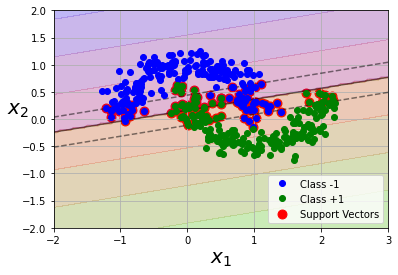

In [ ]:
#Testing linear implementation
MyLinearSVM = MySVM(C=5)
MyLinearSVM.fit(X_train, y_train)
lin_predict = MyLinearSVM.predict(X_test)

#Testing model on testing set and running metrics on it
print("\n\nConfusion matrix for test set:\n", confusion_matrix(y_test, lin_predict))
print("\nPrecision score for test set: ", precision_score(y_test, lin_predict))
print("\nRecall score for test set: ", recall_score(y_test, lin_predict))
print("\nFull Classification report for test set: \n", classification_report(y_test, lin_predict))

print("\nGraph showing chosen support vectors and points:")
plot_svm(MyLinearSVM, X_train, y_train)




In the case of my linear SVM implementation versus the library implementation, my implementation actually performed better. Using the optimal hyperparameters found by GridSearch in step two (C=5) did as best it could for classifying non-linear data. 

The results below:

My Linear | Library Linear
--- | ---
Precision = 0.8333 | Precision = 0.8196
Recall = 0.909 | Recall = 0.909

In terms of the plot, they look nearly identical. This gives me a lot of confidence that my implementation is correct.

     pcost       dcost       gap    pres   dres
 0: -9.8231e+01 -7.5897e+01  2e+03  2e+01  3e-14
 1: -1.9498e+01 -7.0972e+01  2e+02  1e+00  2e-14
 2: -1.3308e+01 -4.4719e+01  5e+01  3e-01  5e-15
 3: -1.2271e+01 -2.1208e+01  1e+01  5e-02  4e-15
 4: -1.3303e+01 -1.5384e+01  3e+00  1e-02  2e-15
 5: -1.3872e+01 -1.4253e+01  4e-01  1e-03  2e-15
 6: -1.3988e+01 -1.4071e+01  9e-02  2e-04  1e-15
 7: -1.4018e+01 -1.4028e+01  1e-02  2e-05  2e-15
 8: -1.4022e+01 -1.4022e+01  2e-04  3e-07  2e-15
 9: -1.4022e+01 -1.4022e+01  2e-06  3e-09  2e-15
Optimal solution found.
170 support vectors out of 400 points


Confusion matrix for test set:
 [[37  8]
 [ 0 55]]

Precision score for test set:  0.92

Recall score for test set:  0.92

Full Classification report for test set: 
               precision    recall  f1-score   support

        -1.0       1.00      0.82      0.90        45
         1.0       0.87      1.00      0.93        55

    accuracy                           0.92       100
   macro avg  

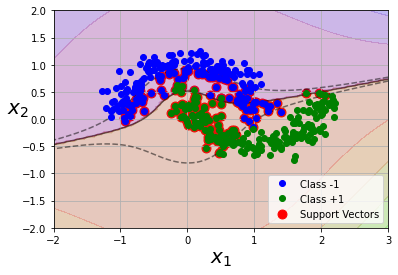

In [ ]:
#testing polynomial implementation
MyPolynomialSVM = MySVM(kernel=polynomial_kernel, C=0.1)
MyPolynomialSVM.fit(X_train, y_train)
poly_predict = MyPolynomialSVM.predict(X_test)

#Testing model on testing set and running metrics on it
print("\n\nConfusion matrix for test set:\n", confusion_matrix(y_test, poly_predict))
print("\nPrecision score for test set: ", precision_score(y_test, poly_predict, average="micro"))
print("\nRecall score for test set: ", recall_score(y_test, poly_predict, average="micro"))
print("\nFull Classification report for test set: \n",classification_report(y_test, poly_predict))

print("\nGraph showing chosen support vectors and points:")
plot_svm(MyPolynomialSVM, X_train, y_train)

In the case of my polynomial SVM implementation versus the library implementation, my implementation performed slightly worse. Using the optimal hyperparameters found by GridSearch in step two (C=1, degree=5) my model still classified the data pretty well. 

The results below:

My Polynomial | Library Polynomial
--- | ---
Precision = 0.92 | Precision = 0.9482
Recall = 0.92 | Recall = 1.0

In terms of the plots, they look very similar. I'm assuming they were close, but the library implementation has a cleaner, more adaptive function than I do.

After testing multiple different sets of hyperparamaters on my polynomial model (degree=3,4,6 | C=0.01,1,5,10) that were found to be non optimal in step 2 I couldn't improve the performance. This gives me confidence that my implementation is correct, but not as robust as the library model.


     pcost       dcost       gap    pres   dres
 0: -1.7967e+01 -5.5184e+02  2e+03  2e+00  6e-16
 1: -5.9231e+00 -2.3140e+02  2e+02  6e-16  7e-16
 2: -1.9192e+01 -6.0973e+01  4e+01  9e-16  7e-16
 3: -2.3704e+01 -3.5442e+01  1e+01  2e-16  5e-16
 4: -2.5424e+01 -2.8691e+01  3e+00  7e-16  5e-16
 5: -2.6072e+01 -2.6814e+01  7e-01  7e-16  5e-16
 6: -2.6200e+01 -2.6560e+01  4e-01  5e-16  4e-16
 7: -2.6291e+01 -2.6384e+01  9e-02  5e-16  4e-16
 8: -2.6316e+01 -2.6341e+01  3e-02  2e-15  4e-16
 9: -2.6323e+01 -2.6331e+01  8e-03  2e-16  5e-16
10: -2.6326e+01 -2.6326e+01  6e-04  3e-15  4e-16
11: -2.6326e+01 -2.6326e+01  2e-05  2e-15  4e-16
Optimal solution found.
69 support vectors out of 400 points


Confusion matrix for test set:
 [[43  2]
 [ 0 55]]

Precision score for test set:  0.98

Recall score for test set:  0.98

Full Classification report for test set: 
               precision    recall  f1-score   support

        -1.0       1.00      0.96      0.98        45
         1.0       0.96   

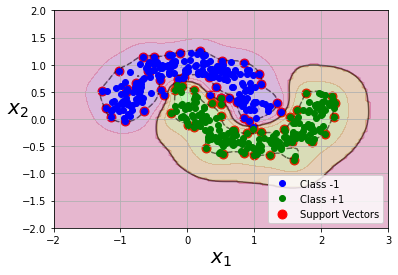

In [ ]:
#testing RBF implementation
MyRBFSVM = MySVM(kernel=rbf_kernel, C=1)
MyRBFSVM.fit(X_train, y_train)
rbf_predict = MyRBFSVM.predict(X_test)

#Testing model on testing set and running metrics on it
print("\n\nConfusion matrix for test set:\n", confusion_matrix(y_test, rbf_predict))
print("\nPrecision score for test set: ", precision_score(y_test, rbf_predict, average="micro"))
print("\nRecall score for test set: ", recall_score(y_test, rbf_predict, average="micro"))
print("\nFull Classification report for test set: \n",classification_report(y_test, rbf_predict))

print("\nGraph showing chosen support vectors and points:")
plot_svm(MyRBFSVM, X_train, y_train)

In the case of my Gaussian SVM implementation versus the library implementation, my implementation performed about evenly. Using the optimal hyperparameters found by GridSearch in step two (C=1, gamma=5) my model classified the data very well. 

The results below:

My Gaussian | Library Gaussian
--- | ---
Precision = 0.98 | Precision = 0.9482
Recall = 0.98 | Recall = 1.0

In terms of the plots, they look nearly identical. This gives me a lot of confidence that my implementation is correct.

In closing, my implementations of linear, polynomial, and Gaussian SVM algorithms were a success. The linear and Gaussian models performed as good, if not better than the library implementations and the polynomial model still got above 90% in precision and recall scores. That means that these classifiers were extremely accurate and can be used in more versatile cases where particular model customizations would lead to better predictions. Actually coding these models gave me a deeper knowledge of not only these particular models, but how other classifiers work. Working through the internals not only allows you to see how the models work, but enables you to see why they would go wrong and the room for improvement upon them. Looking forward towards Ensemble models, I understand that a collection of these classifiers can band together and become an even better model.

## Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Part of the codes used in this assignment is modified from Mathieu Blondel under the 3-Clause BSD License. Best of luck and have fun!